In [ ]:
#Download Dataset
%%time
from google_drive_downloader import GoogleDriveDownloader as gdd
drive_id = '10TbLFo2cgcmlNjgQMZeiI_D68StH5gfW'
d_path ='/content/dataset_c.zip'

gdd.download_file_from_google_drive(file_id=drive_id , dest_path=d_path, unzip = True)

drive_id = '1TLiVh2jKUUQZyhudPoEQmTRscQnLxo9g'
d_path ='/content/dataset2.zip'

gdd.download_file_from_google_drive(file_id=drive_id , dest_path=d_path, unzip = True)


Unzipping...Done.
Unzipping...Done.
CPU times: user 5.79 s, sys: 2.82 s, total: 8.6 s
Wall time: 10.7 s


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# **Dataset 1**

In [ ]:
# Hyperparameters for exp 1

batch_size = 20
num_iters = 20000
input_dim = 180*180 # num_features = 32400
num_hidden = 200 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import pandas as pd

df = pd.read_csv('/content/training-c.csv')
df = df[['filename','digit']]
df.head()

,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7


In [ ]:
df.describe()

,digit
count,24298.000000
mean,4.494485
std,2.866339
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


In [ ]:
#Save in class wise folder
import os
path = '/content/training-c/'
for index,row in df.iterrows():
  new_path=path+str(row['digit'])
  if(os.path.isdir(new_path)):
    os.rename(path+row['filename'],new_path+'/'+row['filename'])
  else:
    os.makedirs(new_path )
    os.rename(path+row['filename'],new_path+'/'+row['filename'])

In [ ]:
'''
LOADING DATASET
'''
transform = transforms.Compose([
                                transforms.Grayscale(),                                 
                                transforms.ToTensor() 
                                ])
 
full_dataset = dsets.ImageFolder(root='/content/training-c',transform= transform )

torch.manual_seed(0)
train_size = int(0.85 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
print(len(train_dataset))
print(len(test_dataset))

20653
3645


In [ ]:
# One Image Size
print(train_dataset[0][0].size())
print(train_dataset[0][0].numpy().shape)
# First Image Label
print(train_dataset[0][1])

torch.Size([1, 180, 180])
(1, 180, 180)
4


In [ ]:
#model 1
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 32400 --> 200
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 200 --> 200
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 200 --> 200
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 200 --> 200
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 200 --> 200
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_5 = nn.ReLU()

         ### 6th hidden layer: 200 --> 200
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 200 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_4(out)
        
        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)
        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS



In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
loss_list1 = []
accuracy_list1 = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 180*180).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 180*180).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            loss_list1.append(loss.item())
            accuracy_list1.append(accuracy)


            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3036367893218994. Accuracy: 10.397805212620028
Iteration: 1000. Loss: 2.305086851119995. Accuracy: 9.327846364883403
Iteration: 1500. Loss: 2.307398557662964. Accuracy: 10.397805212620028
Iteration: 2000. Loss: 2.3028433322906494. Accuracy: 9.437585733882031
Iteration: 2500. Loss: 2.308825969696045. Accuracy: 10.589849108367627
Iteration: 3000. Loss: 2.308546543121338. Accuracy: 10.397805212620028
Iteration: 3500. Loss: 2.3051998615264893. Accuracy: 9.327846364883403
Iteration: 4000. Loss: 2.300776958465576. Accuracy: 9.9039780521262
Iteration: 4500. Loss: 2.3199970722198486. Accuracy: 9.437585733882031
Iteration: 5000. Loss: 2.3035740852355957. Accuracy: 9.327846364883403
Iteration: 5500. Loss: 2.3031818866729736. Accuracy: 10.534979423868313
Iteration: 6000. Loss: 2.305166244506836. Accuracy: 10.013717421124829
Iteration: 6500. Loss: 2.3003697395324707. Accuracy: 14.046639231824416
Iteration: 7000. Loss: 2.309140682220459. Accuracy: 9.437585733882031
Iteration

In [ ]:
accuracy_list1

[10.397805212620028,
 9.327846364883403,
 10.397805212620028,
 9.437585733882031,
 10.589849108367627,
 10.397805212620028,
 9.327846364883403,
 9.9039780521262,
 9.437585733882031,
 9.327846364883403,
 10.534979423868313,
 10.013717421124829,
 14.046639231824416,
 9.437585733882031,
 13.196159122085048,
 9.355281207133059,
 13.443072702331962,
 9.62962962962963,
 10.397805212620028,
 10.644718792866941,
 12.071330589849108,
 9.16323731138546,
 9.574759945130316,
 18.079561042524006,
 16.07681755829904,
 16.570644718792867,
 9.602194787379972,
 9.272976680384089,
 9.190672153635116,
 16.707818930041153,
 12.921810699588477,
 17.229080932784637,
 10.0960219478738,
 9.410150891632373,
 16.378600823045268,
 19.478737997256516,
 18.353909465020575,
 14.567901234567902,
 14.348422496570645]

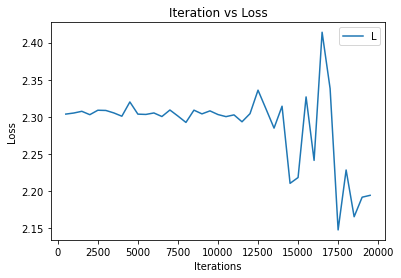

In [ ]:
import matplotlib.pyplot as plt
itr = [(loss_list1.index(i)+1)*500 for i in loss_list1]

plt.plot(itr,loss_list1)
plt.title('Iteration vs Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend('Loss Curve',loc='best')
plt.show()

In [ ]:
# Hyperparameters for exp 2

batch_size = 100
num_iters = 100000
input_dim = 64*64 # num_features = 784
num_hidden = 100 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
LOADING DATASET
'''
transform = transforms.Compose([
                                transforms.Grayscale(),                                 
                                transforms.Resize((64,64)),
                              #  transforms.CenterCrop((64,64)), 
                                transforms.ToTensor(),             
                              ])
 
full_dataset = dsets.ImageFolder(root='/content/training-c',transform= transform )

torch.manual_seed(0)
train_size = int(0.85 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
#model 2
class DeepNeuralNetworkModel2(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 4096 --> 784
        self.linear_1 = nn.Linear(input_size, 784)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 784 --> 392
        self.linear_2 = nn.Linear(784, 392)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 392 --> 196
        self.linear_3 = nn.Linear(392, 196)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

       

        ### Output layer: 196 --> 10
        self.linear_out = nn.Linear(196, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS



In [ ]:
model = DeepNeuralNetworkModel2(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


iter = 0
#loadedModel = torch.load('/content/drive/MyDrive/Soft_Computing/Assignment2/exp1_model2-iteration-100188.pt')
#iter = loadedModel['iter']
#epoch=  loadedModel['epoch']
#model.load_state_dict(loadedModel['model_state'])
#model.eval()

loss_list1_2 = []
accuracy_list1_2 = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 64*64).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 64*64).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            
            accuracy = 100 * correct.item() / total
            loss_list1_2.append(loss.item())
            accuracy_list1_2.append(accuracy)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 100500. Loss: 0.1344817727804184. Accuracy: 84.00548696844993
Iteration: 101000. Loss: 0.2472233772277832. Accuracy: 83.84087791495199
Iteration: 101500. Loss: 0.13270047307014465. Accuracy: 84.2249657064472
Iteration: 102000. Loss: 0.1188058853149414. Accuracy: 84.11522633744856
Iteration: 102500. Loss: 0.2999555170536041. Accuracy: 84.0877914951989
Iteration: 103000. Loss: 0.15855102241039276. Accuracy: 83.95061728395062
Iteration: 103500. Loss: 0.2795233130455017. Accuracy: 83.97805212620027
Iteration: 104000. Loss: 0.22572824358940125. Accuracy: 84.0877914951989
Iteration: 104500. Loss: 0.24553824961185455. Accuracy: 84.00548696844993
Iteration: 105000. Loss: 0.1333681046962738. Accuracy: 84.00548696844993
Iteration: 105500. Loss: 0.14624245464801788. Accuracy: 84.25240054869684
Iteration: 106000. Loss: 0.23454366624355316. Accuracy: 84.2249657064472
Iteration: 106500. Loss: 0.21846126019954681. Accuracy: 84.19753086419753
Iteration: 107000. Loss: 0.11050122231245041. Ac

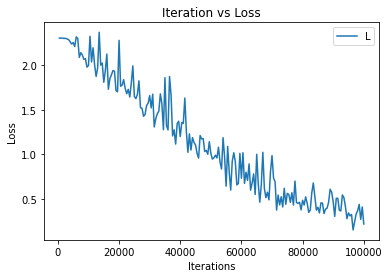

In [ ]:
import matplotlib.pyplot as plt
itr = [(loss_list1_2.index(i)+1)*500 for i in loss_list1_2]

plt.plot(itr,loss_list1_2)
plt.title('Iteration vs Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend('Loss Curve',loc='best')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [ ]:
dest = '/content/drive/MyDrive/Soft_Computing/Assignment2/'

In [ ]:
with open(dest+"model1_exp1.txt", "w") as output:
    output.write(str(loss_list1))
    output.write('\n')
    output.write(str(accuracy_list1))

In [ ]:
path=dest
path += f"exp1_model2-iteration-{iter}.pt"
save_obj = {

       'epoch': epoch,
       'iter': iter,
       'model_state': model.state_dict(),
       'optimizer_state': optimizer.state_dict(),       
       }
torch.save(model.state_dict(), path)




In [ ]:
with open(dest+"model2_exp1.txt", "w") as output:
    output.write(str(loss_list1_2))
    output.write('\n')
    output.write(str(accuracy_list1_2))

# **Dataset 2**

In [ ]:
!pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7919 sha256=873e0742c8e86f91fa4502ef345d538862942925cb0d258d3879dd3a92a3557b
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy


In [ ]:
#dataset preparation
#train dataset
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
from PIL import Image
    
imagefile = '/content/Dataset_2/train-images-idx3-ubyte'
imagearray = idx2numpy.convert_from_file(imagefile)
print(imagearray[0].shape)
labels_path = '/content/Dataset_2/train-labels-idx1-ubyte'
labels = idx2numpy.convert_from_file(labels_path)
labels[0]

train_d2='/content/Dataset_2/train'
if(not os.path.isdir(train_d2)):
  os.makedirs(train_d2)


for i in range(len(labels)):
  pixels = np.array(imagearray[i], dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
 # pixels = pixels.reshape((28, 28))
  if(not os.path.isdir(train_d2+'/'+str(labels[i]))):
      os.makedirs(train_d2+'/'+str(labels[i]))

  n = len(os.listdir(train_d2+'/'+str(labels[i])))+1
  
  im = Image.fromarray(pixels)
  im.save(train_d2+'/'+str(labels[i])+'/'+str(n)+'.png')

  
  

#plt.imshow(imagearray[4], cmap=plt.cm.binary)

(28, 28)


In [ ]:
#test dataset 2
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
from PIL import Image
    
imagefile = '/content/Dataset_2/t10k-images-idx3-ubyte'
imagearray = idx2numpy.convert_from_file(imagefile)
print(imagearray[0].shape)
labels_path = '/content/Dataset_2/t10k-labels-idx1-ubyte'
labels = idx2numpy.convert_from_file(labels_path)
labels[0]

ds2='/content/Dataset_2/test'
if(not os.path.isdir(ds2)):
  os.makedirs(ds2)


for i in range(len(labels)):
  pixels = np.array(imagearray[i], dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
 # pixels = pixels.reshape((28, 28))
  if(not os.path.isdir(ds2+'/'+str(labels[i]))):
      os.makedirs(ds2+'/'+str(labels[i]))

  n = len(os.listdir(ds2+'/'+str(labels[i])))+1
  
  im = Image.fromarray(pixels)
  im.save(ds2+'/'+str(labels[i])+'/'+str(n)+'.png')

  
  

#plt.imshow(imagearray[4], cmap=plt.cm.binary)

(28, 28)


In [ ]:
# Hyperparameters for exp 1

batch_size = 20
num_iters = 20000
input_dim = 28*28 # num_features = 784
num_hidden = 200 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
!rm -r '/content/Dataset_2/train/MNIST'

In [ ]:
'''
LOADING DATASET
'''
transform = transforms.Compose([
                                transforms.Grayscale(),                                 
                                transforms.ToTensor() 
                                ])
 
train_dataset = dsets.ImageFolder(root='/content/Dataset_2/train',transform= transform )
test_dataset = dsets.ImageFolder(root='/content/Dataset_2/test',transform= transform )


'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
print(len(train_dataset))
print(len(test_dataset))
# One Image Size
print(train_dataset[0][0].size())
print(train_dataset[0][0].numpy().shape)
# First Image Label
print(train_dataset[0][1])


60000
10000
torch.Size([1, 28, 28])
(1, 28, 28)
0


In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
loss_list2 = []
accuracy_list2 = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
       

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)
                

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            loss_list2.append(loss.item())
            accuracy_list2.append(accuracy)


            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

In [ ]:
import matplotlib.pyplot as plt
itr = [(loss_list2.index(i)+1)*500 for i in loss_list2]

plt.plot(itr,loss_list2)
plt.title('Iteration vs Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend('Loss Curve',loc='best')
plt.show()

In [ ]:
# Hyperparameters for exp 2

batch_size = 100
num_iters = 50000
input_dim = 28*28 # num_features = 784
num_hidden = 100 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
model = DeepNeuralNetworkModel2(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
loss_list2_2 = []
accuracy_list2_2 = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            loss_list2_2.append(loss.item())
            accuracy_list2_2.append(accuracy)


            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

In [ ]:
import matplotlib.pyplot as plt
itr = [(loss_list2_2.index(i)+1)*500 for i in loss_list2_2]

plt.plot(itr,loss_list2_2)
plt.title('Iteration vs Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend('Loss Curve',loc='best')
plt.show()

# **Visualization of Comparison**

In [ ]:
m1_exp1_path='/content/drive/MyDrive/Soft_Computing/Assignment2/model1_exp1.txt'
m2_exp1_path='/content/drive/MyDrive/Soft_Computing/Assignment2/model2_exp1.txt'
m2_e2_extra='/content/drive/MyDrive/Soft_Computing/Assignment2/model2_exp1_part2.txt'
m1_exp2_path='/content/drive/MyDrive/Soft_Computing/Assignment2/model1_exp2.txt'
m2_exp2_path='/content/drive/MyDrive/Soft_Computing/Assignment2/model2_exp2.txt'


In [ ]:
with open(m1_exp1_path) as f:
    lines = f.read().splitlines()
    m1_e1_loss =[float(x) for x in lines[0][1:-1].split(", ")]
    m1_e1_acc = [float(x) for x in lines[1][1:-1].split(", ")]
    print(m1_e1_acc)


In [ ]:
with open(m2_exp1_path) as f:
    lines = f.read().splitlines()
    m2_e1_loss =[float(x) for x in lines[0][1:-1].split(", ")]
    m2_e1_acc = [float(x) for x in lines[1][1:-1].split(", ")]
    print(m2_e1_acc)

with open(m2_e2_extra) as f:
    lines = f.read().splitlines()
    tmp_l =[float(x) for x in lines[0][1:-1].split(", ")]
    tmp_acc = [float(x) for x in lines[1][1:-1].split(", ")]
    print(tmp_l)

m2_e1_loss =[*m2_e1_loss,*tmp_l]
m2_e1_acc = [*m2_e1_acc,*tmp_acc]

m2_e1_acc

        

In [ ]:
with open(m1_exp2_path) as f:
    lines = f.read().splitlines()
    m1_e2_loss =[float(x) for x in lines[0][1:-1].split(", ")]
    m1_e2_acc = [float(x) for x in lines[1][1:-1].split(", ")]
    print(m1_e2_acc)


    

In [ ]:
with open(m2_exp2_path) as f:
    lines = f.read().splitlines()
    m2_e2_loss =[float(x) for x in lines[0][1:-1].split(", ")]
    m2_e2_acc = [float(x) for x in lines[1][1:-1].split(", ")]
    print(m2_e2_acc)


    

In [ ]:
import matplotlib.pyplot as plt
itr = [(m1_e1_loss.index(i)+1)*500 for i in m1_e1_loss]

plt.plot(itr,m1_e1_loss,label = "Dataset 1")

itr = [(m1_e2_loss.index(i)+1)*500 for i in m1_e2_loss]

plt.plot(itr,m1_e2_loss,label = "Dataset 2")

plt.title('Iteration vs Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss comparison between two datasets(Model 1) ')
# show a legend on the plot
plt.legend()

plt.show()



In [ ]:
import matplotlib.pyplot as plt
itr = [(m1_e1_acc.index(i)+1)*500 for i in m1_e1_acc]

plt.plot(itr,m1_e1_acc,label = "Dataset 1")

itr = [(m1_e2_acc.index(i)+1)*500 for i in m1_e2_acc]

plt.plot(itr,m1_e2_acc,label = "Dataset 2")

plt.title('Iteration vs Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Accuracy comparison between two datasets(Model 1) ')
# show a legend on the plot
plt.legend()

plt.show()



In [ ]:
import matplotlib.pyplot as plt
itr = [(m2_e1_loss.index(i)+1)*500 for i in m2_e1_loss]

plt.plot(itr,m2_e1_loss,label = "Dataset 1")

itr = [(m2_e2_loss.index(i)+1)*500 for i in m2_e2_loss]

plt.plot(itr,m2_e2_loss,label = "Dataset 2")

plt.title('Iteration vs Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss comparison between two datasets(Model 2) ')
# show a legend on the plot
plt.legend()

plt.show()



In [ ]:
import matplotlib.pyplot as plt
itr = [(m2_e1_acc.index(i)+1)*500 for i in m2_e1_acc]

plt.plot(itr,m2_e1_acc,label = "Dataset 1")

itr = [(m2_e2_acc.index(i)+1)*500 for i in m2_e2_acc]

plt.plot(itr,m2_e2_acc,label = "Dataset 2")

plt.title('Iteration vs Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Accuracy comparison between two datasets(Model 2) ')
# show a legend on the plot
plt.legend()

plt.show()

